# 경쟁사 

In [3]:
import pandas as pd
 

competitor = pd.read_csv('경쟁사이용.txt', sep = ",",engine='python', encoding = "cp949")
competitor

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


# 고객 

In [4]:
demo = pd.read_csv('고객DEMO.txt', sep = ",",engine='python', encoding = "cp949")
demo

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


In [44]:
pdf1 = pd.pivot_table(demo,                # 피벗할 데이터프레임
                     index = '성별',    # 행 위치에 들어갈 열
                     columns = '연령대',    # 열 위치에 들어갈 열
                     values = '고객번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf1

연령대,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상
성별,,,,,,,,,,
F,11,250,542,1283,2171,2996,3465,2636,1490,1054
M,6,33,143,396,598,681,617,478,284,249


In [42]:
df33 = pd.DataFrame(demo.groupby(['성별', '연령대'])['연령대'].count())
df33

연령대
성별 연령대          
F  19세이하      11
   20세~24세   250
   25세~29세   542
   30세~34세  1283
   35세~39세  2171
   40세~44세  2996
   45세~49세  3465
   50세~54세  2636
   55세~59세  1490
   60세이상    1054
M  19세이하       6
   20세~24세    33
   25세~29세   143
   30세~34세   396
   35세~39세   598
   40세~44세   681
   45세~49세   617
   50세~54세   478
   55세~59세   284
   60세이상     249

In [48]:
df44 = pd.DataFrame(demo.groupby(['연령대'])['연령대'].count())
df44

,연령대
연령대,
19세이하,17
20세~24세,283
25세~29세,685
30세~34세,1679
35세~39세,2769
40세~44세,3677
45세~49세,4082
50세~54세,3114
55세~59세,1774


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '19세이하'),
  Text(1, 0, '20세~24세'),
  Text(2, 0, '25세~29세'),
  Text(3, 0, '30세~34세'),
  Text(4, 0, '35세~39세'),
  Text(5, 0, '40세~44세'),
  Text(6, 0, '45세~49세'),
  Text(7, 0, '50세~54세'),
  Text(8, 0, '55세~59세'),
  Text(9, 0, '60세이상')])

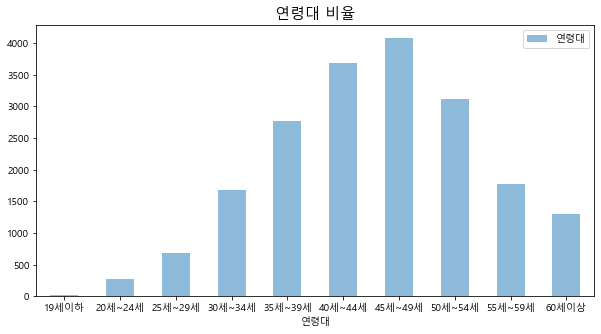

In [49]:
import matplotlib.pyplot as plt
df44.plot(kind='bar', figsize=(10,5), alpha=0.5)
plt.winter()
plt.title("연령대 비율",fontsize=15)
plt.xticks(rotation=0)

In [38]:
plt.rcParams['font.family'] = 'Malgun Gothic'

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

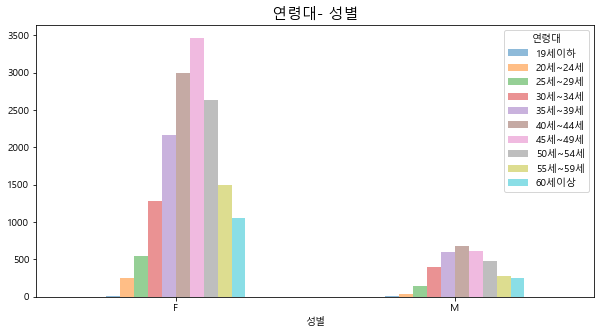

In [47]:
import matplotlib.pyplot as plt
pdf1.plot(kind='bar', figsize=(10,5), alpha=0.5)
plt.autumn()
plt.title("연령대- 성별",fontsize=15)
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

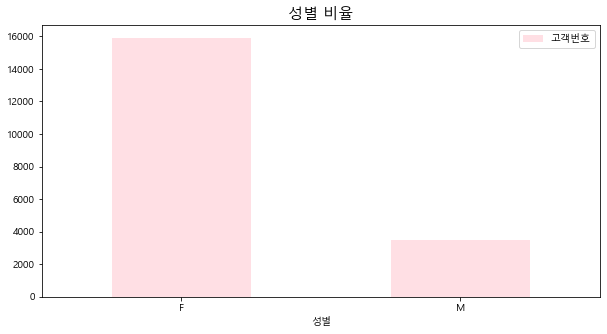

In [39]:
import matplotlib.pyplot as plt
df33.plot(kind='bar', color=['pink','green'], figsize=(10,5), alpha=0.5)
plt.title("성별 비율",fontsize=15)
plt.xticks(rotation=0)

# 채널

In [50]:
channel = pd.read_csv('채널이용.txt', sep = ",",engine='python', encoding = "cp949")
channel['고객번호']

0           7
1          14
2          42
3          74
4          74
        ...  
8819    19168
8820    19291
8821    19312
8822    19351
8823    19356
Name: 고객번호, Length: 8824, dtype: int64

In [51]:
channel_demo = pd.merge(left = channel , right = demo, how = "left", on = "고객번호")
channel_demo

,고객번호,제휴사,이용횟수,성별,연령대,거주지역
0,7,A_MOBILE/APP,4,F,60세이상,36.0
1,14,A_MOBILE/APP,1,F,60세이상,43.0
2,42,B_MOBILE/APP,23,M,60세이상,55.0
3,74,A_MOBILE/APP,1,F,60세이상,55.0
4,74,B_MOBILE/APP,30,F,60세이상,55.0
...,...,...,...,...,...,...
8819,19168,C_ONLINEMALL,18,F,45세~49세,100.0
8820,19291,C_ONLINEMALL,1,F,20세~24세,460.0
8821,19312,B_ONLINEMALL,137,F,35세~39세,43.0
8822,19351,C_ONLINEMALL,19,F,20세~24세,100.0


In [22]:
channel_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8824 entries, 0 to 8823
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    8824 non-null   int64  
 1   제휴사     8824 non-null   object 
 2   이용횟수    8824 non-null   int64  
 3   성별      8824 non-null   object 
 4   연령대     8824 non-null   object 
 5   거주지역    8764 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.6+ KB


In [52]:
channel_demo['거주지역'] = channel_demo['거주지역'].fillna(1)

In [53]:
channel_demo['거주지역'] = channel_demo['거주지역'].astype('int64') 
# channel_demo['거주지역'] = channel_demo['거주지역'].astype('str') 
channel_demo['거주지역']

0        36
1        43
2        55
3        55
4        55
       ... 
8819    100
8820    460
8821     43
8822    100
8823    100
Name: 거주지역, Length: 8824, dtype: int64

In [37]:
df = pd.DataFrame(channel_demo.groupby(['제휴사', '성별'])['성별'].count())
df

성별
제휴사          성별      
A_MOBILE/APP F   1174
             M    261
B_MOBILE/APP F   4374
             M    796
B_ONLINEMALL F   1134
             M    194
C_MOBILE/APP F     38
             M      8
C_ONLINEMALL F    547
             M     71
D_MOBILE/APP F    184
             M     43

In [54]:
pdf2 = pd.pivot_table(channel_demo,                # 피벗할 데이터프레임
                     index = '제휴사',    # 행 위치에 들어갈 열
                     columns = '성별',    # 열 위치에 들어갈 열
                     values = '고객번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf2

성별,F,M
제휴사,,
A_MOBILE/APP,1174,261
B_MOBILE/APP,4374,796
B_ONLINEMALL,1134,194
C_MOBILE/APP,38,8
C_ONLINEMALL,547,71
D_MOBILE/APP,184,43


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'A_MOBILE/APP'),
  Text(1, 0, 'B_MOBILE/APP'),
  Text(2, 0, 'B_ONLINEMALL'),
  Text(3, 0, 'C_MOBILE/APP'),
  Text(4, 0, 'C_ONLINEMALL'),
  Text(5, 0, 'D_MOBILE/APP')])

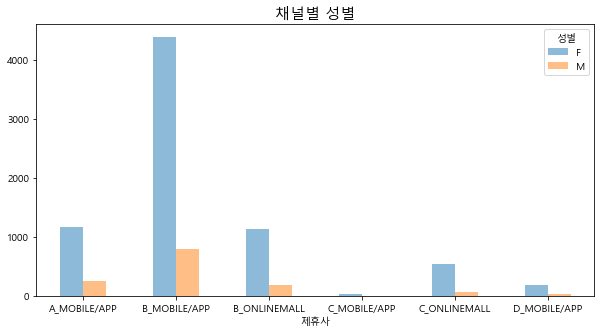

In [55]:
import matplotlib.pyplot as plt
pdf2.plot(kind='bar', figsize=(10,5), alpha=0.5)
plt.winter()
plt.title("채널별 성별",fontsize=15)
plt.xticks(rotation=0)

In [56]:
df2 = pd.DataFrame(channel_demo.groupby(['제휴사'])['이용횟수'].sum())
df2

,이용횟수
제휴사,
A_MOBILE/APP,13256
B_MOBILE/APP,93067
B_ONLINEMALL,8978
C_MOBILE/APP,56
C_ONLINEMALL,3770
D_MOBILE/APP,609


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'A_MOBILE/APP'),
  Text(1, 0, 'B_MOBILE/APP'),
  Text(2, 0, 'B_ONLINEMALL'),
  Text(3, 0, 'C_MOBILE/APP'),
  Text(4, 0, 'C_ONLINEMALL'),
  Text(5, 0, 'D_MOBILE/APP')])

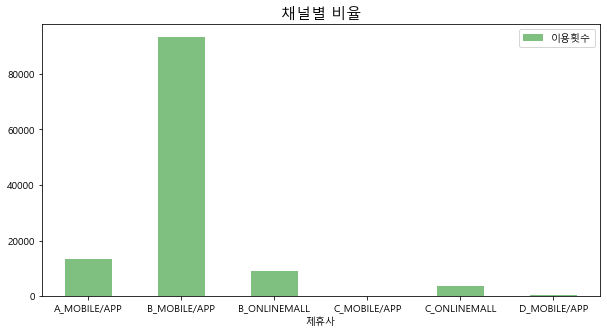

In [57]:
import matplotlib.pyplot as plt
df2.plot(kind='bar', color=['green'], figsize=(10,5), alpha=0.5)
plt.title("채널별 비율",fontsize=15)
plt.xticks(rotation=0)

In [60]:
pdf3 = pd.pivot_table(channel_demo,                # 피벗할 데이터프레임
                     index = '연령대',    # 행 위치에 들어갈 열
                     columns = '제휴사',    # 열 위치에 들어갈 열
                     values = '고객번호',     # 데이터로 사용할 열
                     aggfunc = 'count')   # 데이터 집계함수
pdf3

제휴사,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP
연령대,,,,,,
19세이하,NaN,NaN,NaN,NaN,NaN,3.0
20세~24세,5.0,41.0,8.0,1.0,3.0,61.0
25세~29세,43.0,188.0,58.0,2.0,11.0,69.0
30세~34세,233.0,625.0,220.0,3.0,55.0,36.0
35세~39세,353.0,989.0,312.0,11.0,97.0,26.0
40세~44세,323.0,1064.0,277.0,6.0,134.0,18.0
45세~49세,215.0,1080.0,237.0,12.0,172.0,10.0
50세~54세,133.0,740.0,147.0,9.0,114.0,2.0
55세~59세,85.0,301.0,44.0,2.0,25.0,2.0


In [61]:
pdf3.fillna(0)

제휴사,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP
연령대,,,,,,
19세이하,0.0,0.0,0.0,0.0,0.0,3.0
20세~24세,5.0,41.0,8.0,1.0,3.0,61.0
25세~29세,43.0,188.0,58.0,2.0,11.0,69.0
30세~34세,233.0,625.0,220.0,3.0,55.0,36.0
35세~39세,353.0,989.0,312.0,11.0,97.0,26.0
40세~44세,323.0,1064.0,277.0,6.0,134.0,18.0
45세~49세,215.0,1080.0,237.0,12.0,172.0,10.0
50세~54세,133.0,740.0,147.0,9.0,114.0,2.0
55세~59세,85.0,301.0,44.0,2.0,25.0,2.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '19세이하'),
  Text(1, 0, '20세~24세'),
  Text(2, 0, '25세~29세'),
  Text(3, 0, '30세~34세'),
  Text(4, 0, '35세~39세'),
  Text(5, 0, '40세~44세'),
  Text(6, 0, '45세~49세'),
  Text(7, 0, '50세~54세'),
  Text(8, 0, '55세~59세'),
  Text(9, 0, '60세이상')])

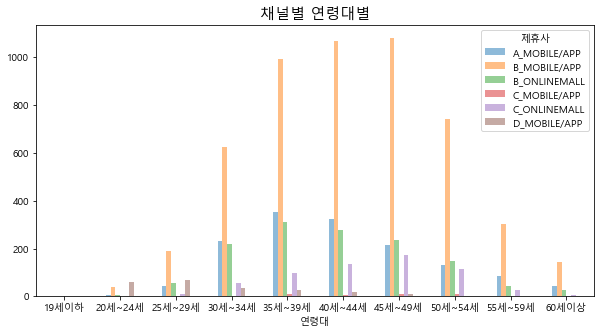

In [63]:
import matplotlib.pyplot as plt
pdf3.plot(kind='bar', figsize=(10,5), alpha=0.5)
plt.spring()
plt.title("채널별 연령대별",fontsize=15)
plt.xticks(rotation=0)

In [39]:
df4 = pd.DataFrame(channel_demo.groupby(['제휴사', '성별'])['이용횟수'].sum())
df4

이용횟수
제휴사          성별       
A_MOBILE/APP F   10940
             M    2316
B_MOBILE/APP F   78152
             M   14915
B_ONLINEMALL F    7604
             M    1374
C_MOBILE/APP F      47
             M       9
C_ONLINEMALL F    3497
             M     273
D_MOBILE/APP F     505
             M     104

In [40]:
df5 = pd.DataFrame(channel_demo.groupby(['제휴사', '연령대'])['이용횟수'].sum())
df5

이용횟수
제휴사          연령대           
A_MOBILE/APP 20세~24세     42
             25세~29세    265
             30세~34세   1558
             35세~39세   3251
             40세~44세   2822
             45세~49세   2495
             50세~54세   1344
             55세~59세    794
             60세이상      685
B_MOBILE/APP 20세~24세    515
             25세~29세   2655
             30세~34세   9089
             35세~39세  17065
             40세~44세  19860
             45세~49세  21119
             50세~54세  14970
             55세~59세   5299
             60세이상     2495
B_ONLINEMALL 20세~24세     19
             25세~29세    285
             30세~34세   1377
             35세~39세   2112
             40세~44세   1917
             45세~49세   1787
             50세~54세   1082
             55세~59세    209
             60세이상      190
C_MOBILE/APP 20세~24세      1
             25세~29세      3
             30세~34세      3
             35세~39세     11
             40세~44세      9
             45세~49세     17
             50세~54세     10
             55세~59세      2
C_ONLINEMALL 20세~24세     22
             25세~29세     52
             30세~34세    179
             35세~39세    634
             40세~44세    855
             45세~49세   1248
             50세~54세    686
             55세~59세     70
             60세이상       24
D_MOBILE/APP 19세이하        8
             20세~24세    182
             25세~29세    206
             30세~34세     85
             35세~39세     65
             40세~44세     28
             45세~49세     21
             50세~54세      9
             55세~59세      5

In [42]:
pd.set_option('display.max_row', 300)

In [44]:
df6 = pd.DataFrame(channel_demo.groupby(['제휴사', '거주지역'])['이용횟수'].sum())
df6.sort_values(by='이용횟수',ascending=False)

이용횟수
제휴사          거주지역       
B_MOBILE/APP 100   33043
             210    8493
             55     7675
             460    7565
A_MOBILE/APP 100    3910
B_MOBILE/APP 500    3616
             540    3604
             16     3181
             340    2742
B_ONLINEMALL 100    2498
B_MOBILE/APP 610    2163
             270    2153
A_MOBILE/APP 460    2068
B_MOBILE/APP 310    1875
             360    1680
             570    1544
             47     1532
             49     1401
C_ONLINEMALL 100    1296
A_MOBILE/APP 55     1191
B_MOBILE/APP 24     1098
             240     978
             410     968
B_ONLINEMALL 210     958
             55      914
A_MOBILE/APP 500     891
             16      875
B_ONLINEMALL 460     858
B_MOBILE/APP 60      855
             10      803
             43      684
             1       652
             75      530
             440     519
             39      491
A_MOBILE/APP 60      402
B_MOBILE/APP 52      399
A_MOBILE/APP 440     395
B_MOBILE/APP 13      368
B_ONLINEMALL 16      364
A_MOBILE/APP 410     342
             210     337
B_ONLINEMALL 500     320
B_MOBILE/APP 27      308
A_MOBILE/APP 13      281
C_ONLINEMALL 610     275
B_MOBILE/APP 630     265
C_ONLINEMALL 410     261
A_MOBILE/APP 610     261
C_ONLINEMALL 210     259
B_MOBILE/APP 82      258
B_ONLINEMALL 43      246
             540     239
A_MOBILE/APP 49      237
B_ONLINEMALL 340     236
C_ONLINEMALL 460     234
A_MOBILE/APP 540     226
C_ONLINEMALL 24      225
B_MOBILE/APP 87      224
B_ONLINEMALL 49      217
A_MOBILE/APP 24      203
B_ONLINEMALL 310     193
B_MOBILE/APP 85      189
             36      179
D_MOBILE/APP 100     178
B_MOBILE/APP 300     171
B_ONLINEMALL 360     164
             610     161
             24      158
B_MOBILE/APP 45      155
A_MOBILE/APP 87      145
             27      144
B_MOBILE/APP 33      141
             65      139
A_MOBILE/APP 1       137
             360     136
B_MOBILE/APP 20      128
B_ONLINEMALL 410     128
             47      127
A_MOBILE/APP 65      124
C_ONLINEMALL 540     121
B_ONLINEMALL 570     120
A_MOBILE/APP 75      110
B_ONLINEMALL 270     109
             75       98
             60       97
A_MOBILE/APP 47       94
B_ONLINEMALL 52       92
C_ONLINEMALL 36       88
A_MOBILE/APP 10       88
             300      86
             36       84
B_MOBILE/APP 30       84
B_ONLINEMALL 440      80
C_ONLINEMALL 340      80
A_MOBILE/APP 39       79
B_ONLINEMALL 36       78
B_MOBILE/APP 72       76
D_MOBILE/APP 460      74
C_ONLINEMALL 570      73
B_ONLINEMALL 27       70
B_MOBILE/APP 79       69
             69       69
C_ONLINEMALL 10       66
B_ONLINEMALL 10       63
A_MOBILE/APP 69       62
             340      61
C_ONLINEMALL 500      59
             75       59
B_ONLINEMALL 87       59
C_ONLINEMALL 72       59
             270      57
             60       56
A_MOBILE/APP 30       55
D_MOBILE/APP 55       54
B_ONLINEMALL 45       50
             39       50
C_ONLINEMALL 55       50
A_MOBILE/APP 43       48
             72       47
C_ONLINEMALL 65       45
             52       43
             47       40
A_MOBILE/APP 20       40
C_ONLINEMALL 16       37
             1        36
B_ONLINEMALL 82       35
C_ONLINEMALL 33       33
             49       31
A_MOBILE/APP 33       31
B_ONLINEMALL 300      30
C_ONLINEMALL 240      26
B_ONLINEMALL 1        26
C_ONLINEMALL 360      24
D_MOBILE/APP 13       23
             49       23
             47       22
B_ONLINEMALL 13       21
D_MOBILE/APP 210      21
A_MOBILE/APP 52       21
B_ONLINEMALL 240      21
C_MOBILE/APP 100      20
B_ONLINEMALL 65       20
C_ONLINEMALL 45       19
             20       19
B_ONLINEMALL 72       18
D_MOBILE/APP 33       17
C_ONLINEMALL 13       17
D_MOBILE/APP 43       16
A_MOBILE/APP 45       16
D_MOBILE/APP 75       15
             52       15
B_ONLINEMALL 85       14
C_ONLINEMALL 39       14
             27       13
D_MOBILE/APP 30       13
             410      13
             36       13
B_ONLINEMALL 33     

In [2]:
import pandas as pd
product = pd.read_csv('상품분류.txt', sep = ",",engine='python', encoding = "cp949")
product_high = pd.read_csv('분류.txt', sep = ",",engine='python', encoding = "cp949")

In [6]:
product['소분류'] = product['소분류코드'].str[:3]
product

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,소분류
0,A,1,101,A010101,일용잡화,위생세제,A01
1,A,1,101,A010102,일용잡화,휴지류,A01
2,A,1,101,A010103,일용잡화,뷰티상품,A01
3,A,1,101,A010104,일용잡화,일용잡화,A01
4,A,1,101,A010105,일용잡화,세트상품,A01
...,...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우,D08
4382,D,8,802,D080205,아이메이크업,메이크업세트,D08
4383,D,8,803,D080301,립메이크업,립스틱/립라이너,D08
4384,D,8,803,D080302,립메이크업,립글로즈/틴트,D08


In [8]:
product_high['소분류'] = product_high['CAT'].str[:3]
product_high.head(10)

,CAT,CATEGORY,TYPE,소분류
0,A01가공식품,식품,일용품,A01
1,A01건강식품,식품,선매품,A01
2,A01기타,멀티샵,일용품,A01
3,A01농산물,식품,일용품,A01
4,A01수산품,식품,일용품,A01
5,A01육류,식품,일용품,A01
6,A01일용잡화,잡화,일용품,A01
7,A01젓갈/반찬,식품,일용품,A01
8,A01주류,식품,일용품,A01
9,A01차/커피,식품,일용품,A01
